<a href="https://colab.research.google.com/github/ahmadryan/MLTSA_RQudsi/blob/master/HW4_RQudsi/chchchchanges_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ruptures
import ruptures as rpt
import pylab as pl
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Synthetic data
the cell below creates a synthetic dataset _(x,y)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(0,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and 25 respectively.

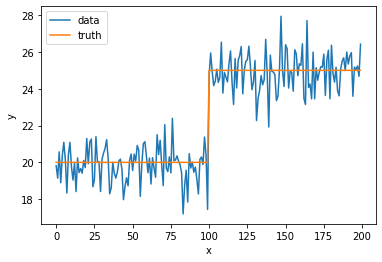

In [3]:
mu1, mu2 = 20, 25
x = np.arange(200)
ym = np.concatenate([np.random.randn(100) + mu1, np.random.randn(100) + mu2])
pl.plot(x, ym, label="data") 
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, label="truth")
pl.xlabel("x")
pl.ylabel("y")
pl.legend();

# Single POC -  difference of means
write a function that finds the POC by assuming a single POC and maximizing the differencem in the means before and after the POC as described in
https://slides.com/federicabianco/mltsa4#/6/1
test it on the synthetic dataset _(x,y)_

In [4]:
def maxdiff(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        diff_here = np.abs(f(ym[i:]) -  f(ym[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(ym[:i]), f(ym[i:])
    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))


poc: 100.00, mean before: 19.84, mean after: 24.92


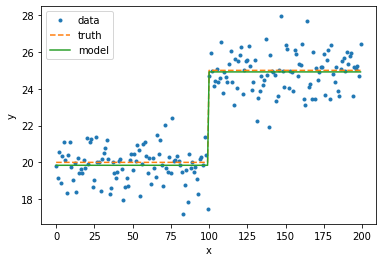

In [5]:
poc, before, after = maxdiff(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

caption

# Single POC - MSE
write a function that finds the POC by minimizing the square error (see slide https://slides.com/federicabianco/mltsa4#/6/2) a single POC and maximizing the differencem in the means before and after the POC. like before return the index of the POC, the mean before and the mean after the POC.
Plot the data, the model, the truth, like in the step above.


Remember to write a docstring for the function https://www.python.org/dev/peps/pep-0257/!

In [0]:
def poc_mse(y):

    N = len(y)
    f = np.nanmean
    poc, diff, before, after, error = 0, 0, np.nan, np.nan, 0
    for i in range(1, N):
        print(poc, before, after, error)
        diff_here = np.abs(f(y[i:]) -  f(y[:i]))
        error_here1 = nansum(np.sqrt((y[:i] - before )**2))
        error_here2 = nansum(np.sqrt((y[i:] - after )**2 ))
        error_here = error_here1 + error_here2

        if ( error_here < error ):

            if(diff < diff_here):

                diff = diff_here
                error = error_here
                poc = i
                before, after = f(y[:i]), f(y[i:])


    return poc, before, after, error

In [48]:

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}, error is: {:.2f}".format(*poc_mse(ym)))


0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 nan nan 0
0 na

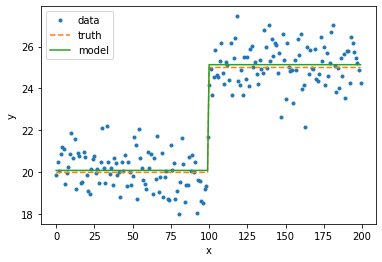

In [0]:
...

caption

# Single POC - diff of variance
Generate a new synthetic dataset _(x,ys)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(\sigma,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and variance 1 and 4 respectively.

Modify the ```maxdiff()``` function so that it take an optional parameter sigma which allows you to use the function to choose the POC that maximizes the different in standard deviation, instead of in mean. An optional argument is an argument that is set to a default in the function call. The default behavior of the function shoudl still be to calculate the POC as the point that maximized the before and after difference in the _mean_.


In [0]:
mu1, mu2 = 20, 25
s2 = 4
ys = np.concatenate([np.random.randn(100)  + mu1 , np.random.randn(100) * s2 + mu1])

In [0]:
def maxdiff(y, sigma=False):
    """calculates the POC as the points that maximized the difference between 
                the mean or variance before and the mean after the POC
    y: vector of endogenouos variables 
    sigma: finds the POC that maximizes the difference between before/after POC variance 
                (optional, default is before/after mean)
    
 ...
print("poc: {:.2f}, standard deviation before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ys, 
                                                                    sigma=True)))


poc: 101.00, standard deviation before: 0.93, standard deviation after: 3.48


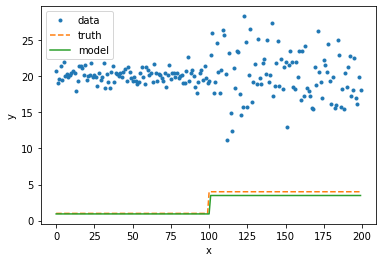

In [0]:
...

# Find POC with rupture python package.
install and import the rupture package.
Find the POC in each synthetic time series.
Use the Pelt method. Reflect on the parameters that should be passed to the predict() function. Read the manual and feel free to ask questions on slack.

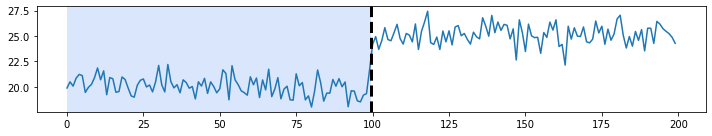

In [0]:
# detection
algo = rpt.Pelt(model=...).fit(ym)
result = algo.predict(pen=...)

# display
rpt.display(ym, [100], result)
pl.show()

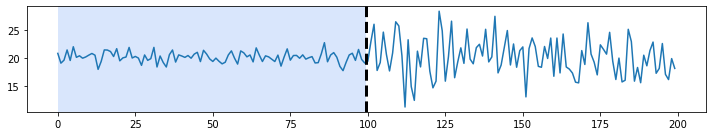

In [0]:
# detection
algo = rpt.Pelt(model=...).fit(ys)
result = algo.predict(pen=...)

# display
rpt.display(ys, [100], result)
pl.show()

# read in the data from LANL earthquake prediction 
I saved in the github repo as "http://fbb.space/mltsa/LALNeq.csv. This is a large file and will take a long time to read in. It is 1/100th of the original file. See how nice I am!?! https://www.kaggle.com/c/LANL-Earthquake-Prediction/data

Visualize and use the method DataFrame.describe() to extract some basic statistics of the dataset

In [0]:
eq1 ...
eq1.describe()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,acoustic_data,time_to_failure
count,4.500000e+06,4.500000e+06
mean,4.616407e+00,8.852012e-01
std,2.614006e+01,3.374432e-01
min,-4.621000e+03,3.008971e-01
25%,2.000000e+00,5.934956e-01
50%,5.000000e+00,8.849986e-01
75%,7.000000e+00,1.177597e+00
max,3.252000e+03,1.469100e+00


In [0]:
eq1.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


# using rupture

Go through the documentation of rupture. 

Find a method that takes as input the number of pocs and has computational complexity O(kN^2) and run it for k=1,2,3 pocs on the first N=10,000, 5000, and 1000 rows of the datasets respectively (make a plot for each and discuss each in the caption)




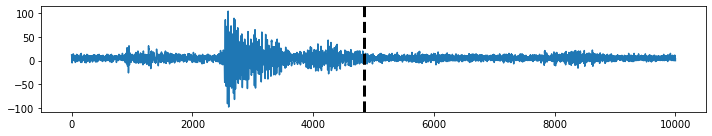

In [0]:
algo1 = rpt....
result = algo1.predict(n_bkps=1)

# display
rpt.display(eq1.acoustic_data.values[:10000], [], result)
plt.show()


caption

In [0]:
algo2 = ...

In [0]:
algo3 = rpt....

Find a method that has computational complexity O(Nlog(N))

Run both methods on the full 10000 rows dataset with the goal is to isolate 3 chunks of the time series. Read about the methods you choose, and describe the constraints you imposed and the paraemters you choose.

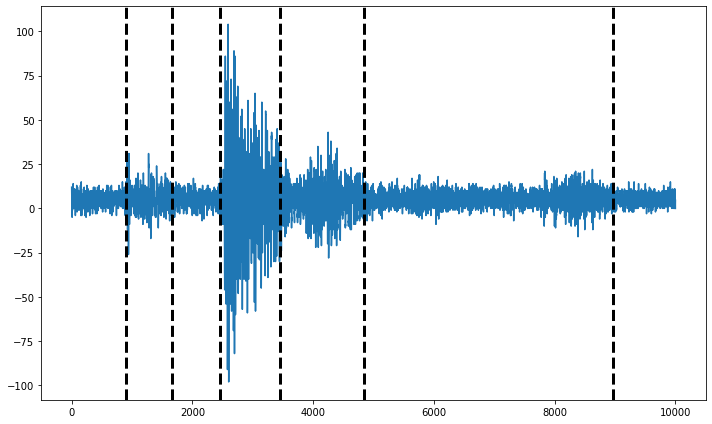

In [0]:
algo = ...

caption (note that your plot does not need to look exactly like mine